# Estatística Descritiva

Estatística é um domínio do conhecimento que se preocupar em compreender dados. 

- Dividida em: 
    - _estatística inferencial_: tirar conclusões dos dados analisados
    - _estatística descritiva_, descrever dados quantitativamente valendo-se de conceitos como "amostra" e "população"

## População e amostra

- _População_: coleção de objetos, ou unidades, sobre a qual a informação é procurada;
- _Amostra_: parte da população observada

## Análise de dados exploratória

- Dados extraídos a partir de medições realizadas em amostras representativas constituem _observações_. 
- Medições e categorias representam uma _distribuição amostral_ de uma certa variável, 
- DAs podem ser usadas para representar aproximadamente a _distribuição populacional_ dessa variável. 
- Análise de dados exploratória: dá subsídios para visualizar e resumir distribuições amostrais de modo que possamos levantar hipóteses sobre a população envolvida.

## Descrição de dados

Neste capítulo, apresentaremos vários métodos desenvolvidos para *Series* e *DataFrames* relacionados à Estatística Descritiva. Começaremos importando as bibliotecas *pandas* e *numpy*.

In [1]:
import numpy as np
import pandas as pd

### Distribuição de frequência

Uma distribuição de frequência é uma tabela que contém um resumo das observações. A distribuição é organizada em uma tabela que contém   _intervalos de classe (grupos)_ e _frequências_ correspondentes.


Abaixo vemos um exemplo simplificado de tabela de distribuição de frequência (número de alunos) e intervalos de classe de alturas para uma amostra de alunos.

| Altura (m) | No. de alunos | 
| :-------------: |:-------------:| 
|1,50 $\vdash$ 1,60   | 5 | 
|1,60 $\vdash$ 1,70   | 15     |   
|1,70 $\vdash$ 1,80   | 17      |   
|1,80 $\vdash$ 1,90    | 3      |   
|Total | 40      |

#### Construção de uma distribuição de frequência

Para ilustrar como se constrói uma distribuição de frequência, vamos considerar um exemplo específico. Suponha que uma pesquisa foi feita e o seguinte conjunto de dados foi obtido:

**Dados Brutos**: 24-23-22-28-35-21-23-33-34-24-21-25-36-26-22-30-32-25-26-33-34-21-31-25-31-26-25-35-33-31.

In [2]:
dados = [24,23,22,28,35,21,23,33,34,24,21,25,36,26,22,30,32,25,26,33,34,21,31,25,31,26,25,35,33,31]

#### Rol de dados

A primeira coisa a fazer é ordenar os dados do menor para o maior, formando o *rol de dados*:

**Rol de dados**: 21-21-21-22-22-23-23-24-25-25-25-25-26-26-26-28-30-31-31-31-32-33-33-33-34-34-34-35-35-36.

In [4]:
np.sort(dados)

array([21, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 26, 26, 26, 28,
       30, 31, 31, 31, 32, 33, 33, 33, 34, 34, 35, 35, 36])

#### Amplitude total

Em seguida, calculamos a *amplitude total* $R$ pela diferença entre o maior $M$ e menor $m$ valores obtidos na amostra.

$$R = M - m$$

Para o caso acima, $R = 36-21 = 15$.

In [5]:
R = np.max(dados) - np.min(dados); R

15

#### Tamanho Amostral

Vamos calcular agora o tamanho amostral, ou seja, o número de observações obtidas na amostra.

In [6]:
n = len(dados); n 

30

Para *Series* e *DataFrames*, podemos usar o método `count()` para retornar o tamanho amostral.

In [7]:
n = pd.Series(dados).count(); n

30

#### Distribuições e histogramas 

Para ter uma visão ampla sobre a distribuição de frequências para o nosso conjunto de dados, podemos plotar o histograma com `plot.hist` diretamente a partir da _Series_ de dados. 

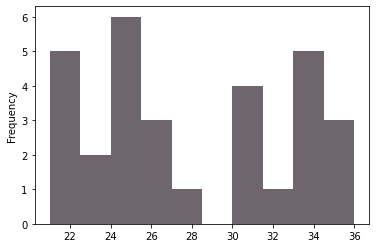

In [15]:
d = pd.Series(dados);
d.plot.hist(color='#4b3f49',alpha=0.8);

#### Número de classes e _binning_ 

A divisão das amostras em intervalos de classe pode ser chamada de _binning_. _Bin_ é o termo utilizado para uma barra vertical no histograma. Por padrão, `plot.hist` usa 10 bins.

Há mais de uma forma de definir o *número de (intervalos) de classe* $K$. A seguir, temos duas regras práticas de decisão:

- Regra 1: $K=5$, para $n\leq 25$ e $K \approx \sqrt{n}$, para $n>25$. 
- Regra 2 (Fórmula de Sturges): $K\approx 1 + 3,22\log n$. 

Vamos aplicá-las aos nossos dados:

In [18]:
# binning usando np.ceil
def binning(d,rule='standard'):       
    
    if isinstance(d,list): d = np.array(d)
    n = len(d)            
    
    if rule == 'standard':
        if n <= 25: K = 5
        else: K = int(np.ceil(np.sqrt(n)))
            
    if rule == 'sturges': 
        K = int(np.ceil(1 + 3.22*np.log10(n)))

    return K

In [19]:
K1,K2 = binning(dados,rule='standard'), binning(dados,rule='sturges'); 
K1,K2

(6, 6)

Uma vez que ambos os valores são iguais, podemos tomar $K = K_1 = K_2 = 6$ e plotar o histograma especificando `bins`.

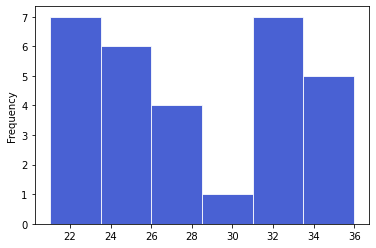

In [20]:
K = K1
d.plot.hist(bins=K,color='#1b3ac9',alpha=0.8,edgecolor='w');

#### Amplitude das classes

Para determinar o comprimento de cada intervalo, ou seja, a amplitude de cada classe $h$, podemos adotar uma divisão uniforme, de modo que:

$$h=\frac{R}{K}$$

In [22]:
h = np.ceil(R/K); h 

3.0

#### Limites das classes

Os *limites das classes* são estabelecidos da seguinte forma. Começando a partir do menor valor obtido da amostra, ou equivalentemente, o primeiro valor do *rol de dados*, somamos a amplitude de maneira progressiva. Dessa maneira, as seguintes classes serão obtidas.
    
| Classes |    
| :-------------:
| 21 $\vdash$ 24 |
| 24 $\vdash$ 27 |  
| 27 $\vdash$ 30 |  
| 30 $\vdash$ 33 | 
| 33 $\vdash$ 36 |  
| 36 $\vdash$ 39 | 

In [24]:
bin_ = [np.min(dados) + i*h.astype('int') for i in range(K+1)]; 
bin_

[21, 24, 27, 30, 33, 36, 39]

#### Frequência dos dados

Ao calcular a frequência de cada intervalo, a chamada _frequência absoluta_, montamos a seguinte tabela de _distribuição de frequências_ será obtida. 

| Classes |   Frequência |
| :-------------:| :-------------:|
| 21 $\vdash$ 24 | 7 |
| 24 $\vdash$ 27 | 9 |  
| 27 $\vdash$ 30 | 1 |  
| 30 $\vdash$ 33 | 5 | 
| 33 $\vdash$ 36 | 7 | 
| 36 $\vdash$ 39 | 1 | 

No *pandas*, a função `cut` cria classes a partir dos dados e o método `value_counts()` cria uma tabela de frequências.

In [25]:
T = pd.cut(dados, bins=bin_, right=False) 
T

[[24, 27), [21, 24), [21, 24), [27, 30), [33, 36), ..., [24, 27), [24, 27), [33, 36), [33, 36), [30, 33)]
Length: 30
Categories (6, interval[int64, left]): [[21, 24) < [24, 27) < [27, 30) < [30, 33) < [33, 36) < [36, 39)]

In [26]:
# labels
T.codes

array([1, 0, 0, 2, 4, 0, 0, 4, 4, 1, 0, 1, 5, 1, 0, 3, 3, 1, 1, 4, 4, 0,
       3, 1, 3, 1, 1, 4, 4, 3], dtype=int8)

In [27]:
# categorias
T.categories

IntervalIndex([[21, 24), [24, 27), [27, 30), [30, 33), [33, 36), [36, 39)], dtype='interval[int64, left]')

In [28]:
# tabela de frequências
T.value_counts() 

[21, 24)    7
[24, 27)    9
[27, 30)    1
[30, 33)    5
[33, 36)    7
[36, 39)    1
dtype: int64

### Aplicações a testes aleatórios

In [85]:
# função genérica
def random_test(ns, dist='rand',binMethod='standard'):        
    if isinstance(ns,int): vals = '(' + str(ns) + ')'
    elif isinstance(ns,tuple): vals = str(ns)
    
    z = eval('np.random.' + dist + vals)    
    T = pd.cut(z,bins=binning(z,binMethod), right=False)
    return pd.Series(z), T.value_counts() 

- Números randômicos

[0.0199, 0.116)    10
[0.116, 0.211)      9
[0.211, 0.307)      8
[0.307, 0.403)     11
[0.403, 0.498)      8
[0.498, 0.594)     12
[0.594, 0.69)      13
[0.69, 0.785)      11
[0.785, 0.881)     12
[0.881, 0.978)      6
dtype: int64

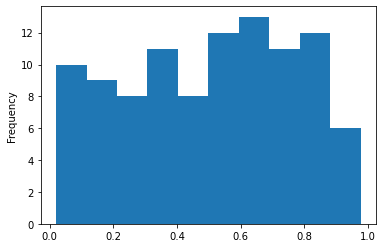

In [84]:
z1,T1 = random_test(100, dist='rand',binMethod='standard')
z1.plot.hist(); T1

[0.00129, 0.125)    11
[0.125, 0.248)      18
[0.248, 0.372)       9
[0.372, 0.495)      14
[0.495, 0.619)      11
[0.619, 0.742)       9
[0.742, 0.866)      17
[0.866, 0.99)       11
dtype: int64

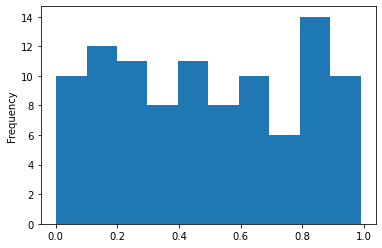

In [83]:
z2,T2 = random_test(100, dist='rand',binMethod='sturges')
z2.plot.hist(); T2

- Distribuição normal

[-2.463, -1.925)     2
[-1.925, -1.388)     5
[-1.388, -0.851)     9
[-0.851, -0.314)    16
[-0.314, 0.224)     23
[0.224, 0.761)      20
[0.761, 1.298)      11
[1.298, 1.835)       9
[1.835, 2.373)       2
[2.373, 2.915)       3
dtype: int64

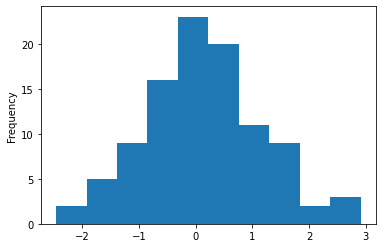

In [98]:
z3,T3 = random_test((0,1,100), dist='normal',binMethod='standard')
z3.plot.hist(); T3

[-2.597, -1.994)     2
[-1.994, -1.391)     4
[-1.391, -0.788)    11
[-0.788, -0.186)    14
[-0.186, 0.417)     23
[0.417, 1.02)       27
[1.02, 1.623)       14
[1.623, 2.23)        5
dtype: int64

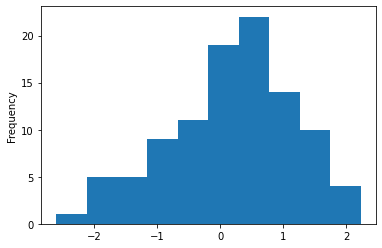

In [111]:
z4,T4 = random_test((0,1,100), dist='normal',binMethod='sturges')
z4.plot.hist(); T4

## Medidas de Tendência Central

As _medidas de tendência central_ (ou de centralidade) são as mais importantes de uma classe maior chamada de _medidas de posição_. Elas representam a tendência de concentração dos dados observados. A seguir, exploraremos algumas medidas de tendência central.

### Média

Quantidade que tem por característica dar um "resumo" para o conjunto de dados. A média $\overline{X}$ é obtida a partir de todos os elementos da distribuição e do tamanho da amostra. 

Calculamos a média aritmética pela fórmula:

$$\overline{X}=\sum_{i=1}^{n}\frac{X_i}{n}.$$


Para *Series* e *DataFrames* o método `mean()` retorna a média dos valores.

In [112]:
pd.Series(dados).mean()

27.833333333333332

### Moda

Definimos a moda $Mo$ de um conjunto de dados como o valor mais frequente deste conjunto. 

Exemplos:

* $\{1, 2, 4, 5, 8\}$. Não há moda (amodal).
* $\{2, 2, 3, 7, 8\}$. Para esta amostra, $Mo$ = 2 (unimodal).
* $\{1, 1, 10, 5, 5, 8, 7, 2\}$. Para esta amostra, $Mo$ = 1 e $Mo=$5 (bimodal). 

Para _Series_ e _DataFrames_, o método `mode()` retorna a moda dos valores.

In [23]:
pd.Series(dados).mode()

0    25
dtype: int64

In [113]:
pd.Series([1,2,2,2,3,4,4,4,5]).mode()

0    2
1    4
dtype: int64

In [114]:
z4.mode()

0    -2.596763
1    -2.017885
2    -1.939213
3    -1.838160
4    -1.706094
        ...   
95    1.647601
96    1.778631
97    2.121072
98    2.140601
99    2.225374
Length: 100, dtype: float64

### Mediana

A mediana $Md$ é o valor que divide o *rol de dados* em duas partes com a mesma quantidade de dados. O *elemento mediano*, $E_{Md}$, é a posição no *rol de dados* onde a mediana está localizada.  

Se o tamanho amostral $n$ é ímpar, temos que $E_{Md} = \frac{(n+1)}{2}$; se par, dois valores são possíveis, $\frac{n}{2}$ e $\frac{n}{2}+1$. No último caso, a mediana será a média dos valores assumidos nestas posições.

Exemplos:

- $\{1, 2, 4, 5, 8\}$. Como $n$ é ímpar, $E_{Md} = 3$, e $Md = 4$.

- $\{2, 2, 4, 7, 8, 10\}$. Aqui, $n$ é par. Assim, $E_{Md,1} = \frac{6}{2} = 3$ e $E_{Md,2} = \frac{6}{2}+1 = 4$. Daí ${Md} = \frac{4+7}{2} = 5,5$.
    
* Para Series e DataFrames o método `median()` retorna a mediana dos valores.

In [115]:
pd.Series(dados).median()

26.0

In [116]:
z2.median()

0.4817839389594648

## Quantis e percentis

Utilizados para compreender os dados sob a perspectiva de "partes". 

Ex.: dado o rol de dados $ d = \{x_i\}$ com $n$ valores, procuramos $x_p$ que divide o rol em partes regulares. 

- $x_p$ é o $p$-ésimo _quantil_, ou o $100 \times p$-ésimo percentil. Em particular, $x_p = d[I_p]$, onde $I_p$ é o índice (número inteiro) para o quantil no rol de dados.

Os seguintes nomes são usados na prática: 

- _Percentis_ variam no intervalo 0 a 100.
- _Quartis_ variam no intervalo 0 a 4.
- _Quantis_ variam de qualquer valor para outro. 

Uma tabela de correspondência útil para compreensão é a seguinte: 

- 0-percentil = 0-quartil = menor valor do rol de dados
- 25-percentil = 1-quartil
- 50-percentil = 2-quartil = mediana
- 75-percentil = 3-quartil
- 100-percentil = 4-quartil = máximo valor do rol de dados 

> Como se vê, a mediana é o 50-percentil. Isto significa que ela representa o valor que está abaixo de 50% dos valores no rol de dados. Quantis, por sua vez, são uma generalização da mediana. 

In [117]:
# 0 < p < 1
def quantil(d,p):
    I_p = int(p*len(d))
    return sorted(d)[I_p]

Por exemplo, para o nosso conjunto:

In [118]:
print(sorted(d),sep=',')

[21, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 26, 26, 26, 28, 30, 31, 31, 31, 32, 33, 33, 33, 34, 34, 35, 35, 36]


In [30]:
quantil(d,0.0),quantil(d,0.25),quantil(d,0.5),quantil(d,0.75),quantil(d,0.9)

(21, 24, 26, 33, 35)

Comentário: 

- A mediana é o valor $x_{1/2} = 26$. Ou seja, $p= 1/2 = 0.5$. Isto equivale a dizer que a mediana é o $1/2$-quantil ou $100 \times 1/2 = 50$-percentil.  
- Para $p=1/4$, temos o $1/4$-quantil ou $100 \times 1/4 = 25$-percentil. Este valor equivale a $x_{1/4} = 24$.
- 24 é o primeiro quartil do rol, ou seja, 25% dos valores do rol são menores do que 24.
- 33 é o terceiro quartil do rol, ou seja, 75% dos valores do rol são menores do que 33.

O _pandas_ possui a função `quantile` para calcular os quantis que desejarmos.

In [123]:
z1.quantile(0.22)

0.2626878677019487

In [125]:
# 1-, 2-, e 3-quartis
z4.quantile([0.25,0.5,0.75])

0.25   -0.373573
0.50    0.300447
0.75    0.812786
dtype: float64

In [126]:
# 1-, 2- tercis
z2.quantile([0.33,0.66])

0.33    0.304235
0.66    0.664050
dtype: float64

## Medidas de Dispersão


As medidas de dispersão medem o grau de variabilidade dos elementos de uma distribuição. O valor zero indica ausência de dispersão. As principais medidas de dispersão incluem: *amplitude*, *desvio médio*, *variância* e *desvio padrão*.

Como uma motivação para estudar as medidas de dispersão, consideremos a seguinte distribuição de notas é médias em uma classe.

|Discente||| Notas||| Média|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|Antônio|5|5|5|5|5|5|
|João |6|4|5|4|6|5|
|José |10|5|5|5|0|5|
|Pedro |10|10|5|0|0|5|

Observa-se que:

- as notas de Antônio não variaram;

- as notas de João variaram menos do que as notas de José;

- as notas de Pedro variaram mais do que as notas dos demais;

### Amplitude

A amplitude $R$ fornece a maior variação possível dos dados. Ela é dada pela fórmula:

$$R = X_{max} -  X_{min},$$

onde $X_{max}$ é o valor máximo $X_{min}$ o mínimo entre os dados.

Para *Series* e *DataFrames* os métodos `max()` e `min()` retornam respectivamente o máximo e o mínimo.

In [127]:
R = pd.Series(dados).max()-pd.Series(dados).min(); R

15

### Desvio Médio

Para medir a dispersão dos dados em relação à média, é interessante analisar os desvios em torno da média, isto é, fazer a análise dos desvios:

$$d_i=(X_i-\overline{X}).$$

Porém, a soma de todos os desvios é igual a zero, como podemos verificar com

$$\sum_{i=1}^{n} d_i= \sum_{i=1}^{n} (X_i-\overline{X})= \sum_{i=1}^{n}X_i-\sum_{i=1}^{n}\overline{X}=\sum_{i=1}^{n}X_i-{n}\overline{X}=$$

$$=\sum_{i=1}^{n}X_i-n\frac{\sum_{i=1}^{n}X_i}{n}= \sum_{i=1}^{n}X_i-\sum_{i=1}^{n}X_i=0.$$

Logo, será preciso encontrar uma maneira de se trabalhar com os desvios sem que a soma dê zero. Dessa forma, define-se o *desvio médio* $DM$ pela fórmula:

$$DM=\sum_{i=1}^{n} \frac{|d_i|}{n}= \sum_{i=1}^{n} \frac{|X_i-\overline{X}|}{n}.$$

Para *Series* e *DataFrames* o método `mad()` retorna a *desvio médio* dos valores.

In [128]:
pd.Series(dados).mad()

4.422222222222222

In [129]:
pd.Series(z3).mad()

0.8022908522790512

**Observações**:

* A *amplitude* não mede bem a dispersão dos dados porque usam-se apenas os valores extremos em vez de todos os elementos da distribuição. 

* O *desvio médio* é mais vantajoso do que a *amplitude*, visto que leva em consideração todos os valores da distribuição e é menos sensível a *outliers*.

* No entanto, o *desvio médio* não é tão frequentemente empregado no ajuste de modelos, pois não apresenta propriedades matemáticas interessantes. Porém é bastante utilizado na validação e comparação de modelos.

> Um _outlier_ é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Wikipedia, apud: Hawkins, 1980). Outlier é um dado que se distancia demasiadamente de todos os outros. Literalmente, o "ponto fora da curva".


### Variância

A *variância* $\sigma^2$ é a medida de dispersão mais utilizada. Ela é dada pelo quociente entre a soma dos quadrados dos desvios e o número de elementos, cuja fórmula é dada por:

$$\sigma^2=\sum_{i=1}^{N} \frac{d_i^2}{N}= \sum_{i=1}^{N} \frac{(X_i-\overline{X})^2}{N},$$

onde $\sigma^2$ indica a variância populacional (lê-se "sigma ao quadrado" ou "sigma dois"). Neste caso, $\overline{X}$ e $N$ na formúla representam a média populacional e o tamanho populacional, respectivamente.

### Variância Amostral

Temos a seguinte definição de *variância amostral*:

$$
S^2=\sum_{i=1}^{n} \frac{d_i^2}{n-1}= \sum_{i=1}^{n} \frac{(X_i-\overline{X})^2}{n-1}.
$$

Para *Series* e *DataFrames* o método `var()` retorna a *variância amostral* dos valores. 

In [132]:
pd.Series(dados).var()

24.281609195402304

In [131]:
pd.Series(z3).var()

1.060163807249227

### Desvio Padrão

Temos também outra medida de dispersão, que é a raiz quadrada da variância, chamada de *desvio padrão*. Assim,

$$\sigma = \sqrt{\sigma^2}$$

é o desvio desvio padrão populacional, e

$$S = \sqrt{S^2}$$

é o desvio desvio padrão amostral.

Para o cálculo do *desvio padrão*, deve-se, primeiramente, determinar o valor da variância e, em seguida, extrair a raiz quadrada desse resultado.

Para *Series* e *DataFrames* o método `std()` retorna o *desvio padrão* dos valores. 

In [133]:
pd.Series(dados).std()

4.9276372832628725

In [134]:
np.sqrt(pd.Series(dados).var()) 

4.9276372832628725

In [135]:
pd.Series(z3).std()

1.029642562858212

In [136]:
np.sqrt(pd.Series(z3).var())

1.029642562858212

## Resumo Estatístico de uma *Series* ou *DataFrame*

Para obtermos um resumo estatístico de uma *Series* ou *DataFrame* do *pandas*, utilizamos o método `describe`. O método `describe` exclui observações ausentes por padrão.

Exemplos:

In [138]:
pd.Series(dados).describe()

count    30.000000
mean     27.833333
std       4.927637
min      21.000000
25%      24.000000
50%      26.000000
75%      32.750000
max      36.000000
dtype: float64

In [140]:
pd.DataFrame(z2).describe()

,0
count,100.000000
mean,0.493710
std,0.293381
min,0.001293
25%,0.229292
50%,0.481784
75%,0.762240
max,0.989137


**Observações**

* Se as entradas da *Series* não forem numéricas, o método `describe` retornará uma tabela contendo as quantidades de valores únicos, o valor mais frequente e a quantidade de elementos do valor mais frequente.

* No caso de um *DataFrame* que contenha colunas numéricas e colunas não-numéricas, o método `describe` irá considerar apenas as colunas numéricas.

Exemplos:

In [141]:
serie_ex1 = pd.Series(['a','b','c','d','e','f','g','h','i','j'])
serie_ex2 = pd.Series(range(10))

In [142]:
serie_ex1.describe()

count     10
unique    10
top        a
freq       1
dtype: object

In [143]:
serie_ex2.describe()

count    10.00000
mean      4.50000
std       3.02765
min       0.00000
25%       2.25000
50%       4.50000
75%       6.75000
max       9.00000
dtype: float64

Exemplo:

In [144]:
df_exemplo = pd.concat([serie_ex1, serie_ex2], axis=1)

In [146]:
df_exemplo

,0,1
0,a,0
1,b,1
2,c,2
3,d,3
4,e,4
5,f,5
6,g,6
7,h,7
8,i,8
9,j,9


Exemplo:

In [148]:
df_exemplo.describe()

,1
count,10.00000
mean,4.50000
std,3.02765
min,0.00000
25%,2.25000
50%,4.50000
75%,6.75000
max,9.00000


> É possível controlar o que será considerado em `describe` utilizando os argumentos `include` ou `exclude`. No caso, devemos passar uma lista contendo os parâmetros a serem incluídos ou excluídos como argumento. Para uma lista dos parâmetros disponíveis, consulte a documentação da função `select_dtypes()`.


Exemplos:

In [149]:
df_exemplo.describe(exclude='number')

,0
count,10
unique,10
top,a
freq,1


In [150]:
df_exemplo.describe(include='object')

,0
count,10
unique,10
top,a
freq,1


Exemplo:

In [152]:
df_exemplo.describe(include='all')

,0,1
count,10,10.00000
unique,10,NaN
top,a,NaN
freq,1,NaN
mean,NaN,4.50000
std,NaN,3.02765
min,NaN,0.00000
25%,NaN,2.25000
50%,NaN,4.50000
75%,NaN,6.75000
